# Data cleaning

In [72]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
#import gas price and electricity price for CA, MA, and TX
import os
os.chdir('/content/drive/My Drive/AM 115 Final Project')


In [74]:
# Import necessary libraries
import glob
import pandas as pd

# Function to clean gasoline price dataset
def clean_gas_price_data(file_path):
    """
    Cleans a gasoline price dataset by skipping metadata rows, renaming columns, and converting date formats.

    Args:
    file_path (str): The path to the gasoline price dataset.

    Returns:
    pd.DataFrame: A cleaned DataFrame containing the gasoline price data.
    """
    try:
        # Read the dataset while skipping the first 4 metadata rows
        df = pd.read_csv(file_path, skiprows=4, engine='python', on_bad_lines='skip')

        # Rename the columns for consistency
        df.columns = ['Week', 'Price_per_Gallon']

        # Convert the 'Week' column to a datetime object with error handling
        df['Week'] = pd.to_datetime(df['Week'], errors='coerce', infer_datetime_format=True)

        return df

    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
        return None
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
        return None

# Function to clean electricity price dataset
def clean_electricity_price_data(file_path):
    """
    Cleans an electricity price dataset by skipping metadata rows, renaming columns, and converting date formats.

    Args:
    file_path (str): The path to the electricity price dataset.

    Returns:
    pd.DataFrame: A cleaned DataFrame containing the electricity price data.
    """
    try:
        # Read the dataset while skipping the first 4 metadata rows
        df = pd.read_csv(file_path, skiprows=4, engine='python', on_bad_lines='skip')

        # Rename the columns for consistency
        df.columns = ['Month', 'Price_per_KWh']

        # Convert the 'Month' column to a datetime object with error handling
        df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)

        return df

    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
        return None
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
        return None

# List all CSV files in the directory
csv_files = glob.glob('*.csv')
print("Available CSV files:", csv_files)

# Define file paths for gasoline and electricity price datasets
file_paths = {
    'CA_GAS': 'CA_GAS.csv',
    'MA_GAS': 'MA_GAS.csv',
    'TX_GAS': 'TX_GAS.csv',
    'US_GAS': 'US_GAS.csv',
    'CA_ELE': 'CA_ELE.csv',
    'MA_ELE': 'MA_ELE.csv',
    'TX_ELE': 'TX_ELE.csv'
}

# Clean the datasets
cleaned_data = {}



Available CSV files: ['MA_GAS.csv', 'TX_GAS.csv', 'TX_ELE.csv', 'CA_ELE.csv', 'MA_ELE.csv', 'CA_GAS.csv', 'US_GAS.csv', 'cleaned_MA_GAS.csv', 'cleaned_MA_ELE.csv', 'cleaned_TX_ELE.csv', 'cleaned_TX_GAS.csv', 'cleaned_CA_ELE.csv', 'cleaned_US_GAS.csv', 'cleaned_CA_GAS.csv']


In [75]:
# Gasoline price datasets
for region, path in file_paths.items():
    if 'GAS' in region:
        cleaned_data[region] = clean_gas_price_data(path)
    elif 'ELE' in region:
        cleaned_data[region] = clean_electricity_price_data(path)

# Display the first few rows of each cleaned dataset
for region, df in cleaned_data.items():
    if df is not None:
        print(f"\nFirst few rows of {region} prices:")
        print(df.head())
    else:
        print(f"Failed to load data for {region}.")

# Export the cleaned data to new CSV files
for region, df in cleaned_data.items():
    if df is not None:
        output_path = f'cleaned_{region}.csv'
        df.to_csv(output_path, index=False)
        print(f"Exported {region} data to {output_path}")



First few rows of CA_GAS prices:
        Week  Price_per_Gallon
0 2024-04-08             5.142
1 2024-04-01             4.904
2 2024-03-25             4.801
3 2024-03-18             4.734
4 2024-03-11             4.693

First few rows of MA_GAS prices:
        Week  Price_per_Gallon
0 2024-03-01             3.352
1 2024-02-01             3.276
2 2024-01-01             3.258
3 2023-12-01             3.383
4 2023-11-01             3.569

First few rows of TX_GAS prices:
        Week  Price_per_Gallon
0 2024-04-08             3.172
1 2024-04-01             3.032
2 2024-03-25             3.128
3 2024-03-18             3.054
4 2024-03-11             2.882

First few rows of US_GAS prices:
        Week  Price_per_Gallon
0 2024-05-06             3.487
1 2024-04-29             3.498
2 2024-04-22             3.506
3 2024-04-15             3.479
4 2024-04-08             3.448

First few rows of CA_ELE prices:
       Month Price_per_KWh
0 1979-03-01         0.052
1 1979-04-01         0.052
2 197

<ipython-input-74-21c741e7ab14>:24: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Week'] = pd.to_datetime(df['Week'], errors='coerce', infer_datetime_format=True)
<ipython-input-74-21c741e7ab14>:24: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Week'] = pd.to_datetime(df['Week'], errors='coerce', infer_datetime_format=True)
<ipython-input-74-21c741e7ab14>:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['We

Exported MA_GAS data to cleaned_MA_GAS.csv
Exported TX_GAS data to cleaned_TX_GAS.csv
Exported US_GAS data to cleaned_US_GAS.csv
Exported CA_ELE data to cleaned_CA_ELE.csv
Exported MA_ELE data to cleaned_MA_ELE.csv
Exported TX_ELE data to cleaned_TX_ELE.csv


# Observe the data - data preparing for modeling

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to save electricity price plots
def save_electricity_prices_plot(datasets, output_path='/content/electricity_prices.png'):
    """
    Saves a plot of electricity prices for multiple datasets.

    Args:
    datasets (dict): A dictionary of DataFrames with keys as dataset names.
    output_path (str): The path to save the output plot.
    """
    plt.figure(figsize=(10, 6))

    for name, df in datasets.items():
        if 'ELE' in name and df is not None:
            # Focus on data from 2000 onwards and drop missing values
            df = df[df['Month'] >= '2000'].dropna()
            df = df.set_index('Month').resample('M').mean()  # Resample monthly
            df['Rolling_Mean'] = df['Price_per_KWh'].rolling(12).mean()  # 12-month rolling mean
            plt.plot(df.index, df['Rolling_Mean'], label=name)

    plt.xlabel('Date')
    plt.ylabel('Price per Kilowatt-Hour (KWh)')
    plt.title('Electricity Prices Over Time')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()
    print(f"Electricity prices plot saved to {output_path}")

# Function to save gasoline price plots
def save_gasoline_prices_plot(datasets, output_path='/content/gasoline_prices.png'):
    """
    Saves a plot of gasoline prices for multiple datasets.

    Args:
    datasets (dict): A dictionary of DataFrames with keys as dataset names.
    output_path (str): The path to save the output plot.
    """
    plt.figure(figsize=(10, 6))

    for name, df in datasets.items():
        if 'GAS' in name and df is not None:
            # Focus on data from 1990 onwards and drop missing values
            df = df[df['Week'] >= '1990'].dropna()
            df = df.set_index('Week').resample('W').mean()  # Resample weekly
            df['Rolling_Mean'] = df['Price_per_Gallon'].rolling(12).mean()  # 12-week rolling mean
            plt.plot(df.index, df['Rolling_Mean'], label=name)

    plt.xlabel('Date')
    plt.ylabel('Price per Gallon')
    plt.title('Gasoline Prices Over Time')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()
    print(f"Gasoline prices plot saved to {output_path}")

# Function to clean electricity price dataset
def clean_electricity_price_data(file_path):
    """
    Cleans an electricity price dataset by skipping metadata rows, renaming columns, and converting date formats.

    Args:
    file_path (str): The path to the electricity price dataset.

    Returns:
    pd.DataFrame: A cleaned DataFrame containing the electricity price data.
    """
    try:
        # Read the dataset while skipping the first 4 metadata rows
        df = pd.read_csv(file_path, skiprows=4, engine='python', on_bad_lines='skip')

        # Rename the columns for consistency
        df.columns = ['Month', 'Price_per_KWh']

        # Convert the 'Month' column to a datetime object with error handling
        df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)

        return df

    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
        return None
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
        return None

# Function to clean gasoline price dataset
def clean_gas_price_data(file_path):
    """
    Cleans a gasoline price dataset by skipping metadata rows, renaming columns, and converting date formats.

    Args:
    file_path (str): The path to the gasoline price dataset.

    Returns:
    pd.DataFrame: A cleaned DataFrame containing the gasoline price data.
    """
    try:
        # Read the dataset while skipping the first 4 metadata rows
        df = pd.read_csv(file_path, skiprows=4, engine='python', on_bad_lines='skip')

        # Rename the columns for consistency
        df.columns = ['Week', 'Price_per_Gallon']

        # Convert the 'Week' column to a datetime object with error handling
        df['Week'] = pd.to_datetime(df['Week'], errors='coerce', infer_datetime_format=True)

        return df

    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
        return None
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
        return None

# Clean the datasets
cleaned_data = {}

for region, path in file_paths.items():
    if 'GAS' in region:
        cleaned_data[region] = clean_gas_price_data(path)
    elif 'ELE' in region:
        cleaned_data[region] = clean_electricity_price_data(path)

# Save the plots
save_electricity_prices_plot(cleaned_data, output_path='/content/electricity_prices.png')
save_gasoline_prices_plot(cleaned_data, output_path='/content/gasoline_prices.png')


<ipython-input-76-c5a571444642>:113: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Week'] = pd.to_datetime(df['Week'], errors='coerce', infer_datetime_format=True)
<ipython-input-76-c5a571444642>:113: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Week'] = pd.to_datetime(df['Week'], errors='coerce', infer_datetime_format=True)
<ipython-input-76-c5a571444642>:113: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[

Electricity prices plot saved to /content/electricity_prices.png
Gasoline prices plot saved to /content/gasoline_prices.png


# Statewise plots

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to clean electricity price dataset
def clean_electricity_price_data(file_path):
    """
    Cleans an electricity price dataset by skipping metadata rows, renaming columns, and converting date formats.

    Args:
    file_path (str): The path to the electricity price dataset.

    Returns:
    pd.DataFrame: A cleaned DataFrame containing the electricity price data.
    """
    try:
        # Read the dataset while skipping the first 4 metadata rows
        df = pd.read_csv(file_path, skiprows=4, engine='python', on_bad_lines='skip')

        # Rename the columns for consistency
        df.columns = ['Month', 'Price_per_KWh']

        # Convert the 'Month' column to a datetime object with error handling
        df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)

        return df

    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
        return None
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
        return None

# Function to clean gasoline price dataset and aggregate to monthly averages
def clean_gas_price_data(file_path):
    """
    Cleans a gasoline price dataset by skipping metadata rows, renaming columns, and converting date formats.

    Args:
    file_path (str): The path to the gasoline price dataset.

    Returns:
    pd.DataFrame: A cleaned DataFrame containing the gasoline price data.
    """
    try:
        # Read the dataset while skipping the first 4 metadata rows
        df = pd.read_csv(file_path, skiprows=4, engine='python', on_bad_lines='skip')

        # Rename the columns for consistency
        df.columns = ['Week', 'Price_per_Gallon']

        # Convert the 'Week' column to a datetime object with error handling
        df['Week'] = pd.to_datetime(df['Week'], errors='coerce', infer_datetime_format=True)

        # Aggregate to monthly averages
        df = df.set_index('Week').resample('M').mean().reset_index()
        df.columns = ['Month', 'Price_per_Gallon']

        return df

    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
        return None
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
        return None

# Function to save combined electricity and gasoline plots for each state
def save_combined_state_plot(state, gas_df, elec_df, output_path):
    """
    Saves a combined plot of electricity and gasoline prices for a specific state.

    Args:
    state (str): The state name or abbreviation.
    gas_df (pd.DataFrame): The gasoline price DataFrame for that state.
    elec_df (pd.DataFrame): The electricity price DataFrame for that state.
    output_path (str): The path to save the output plot.
    """
    plt.figure(figsize=(10, 6))

    # Process gasoline data
    if gas_df is not None and not gas_df.empty:
        gas_df = gas_df[gas_df['Month'] >= '2000'].dropna()
        gas_df['Rolling_Mean'] = gas_df['Price_per_Gallon'].rolling(12).mean()
        plt.plot(gas_df['Month'], gas_df['Rolling_Mean'], label=f"{state} Gasoline Prices (per Gallon)")

    # Process electricity data
    if elec_df is not None and not elec_df.empty:
        elec_df = elec_df[elec_df['Month'] >= '2000'].dropna()
        elec_df['Rolling_Mean'] = elec_df['Price_per_KWh'].rolling(12).mean()
        plt.plot(elec_df['Month'], elec_df['Rolling_Mean'], label=f"{state} Electricity Prices (per KWh)")

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{state} Gasoline and Electricity Prices Over Time')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()
    print(f"Combined {state} plot saved to {output_path}")

# Define file paths for gasoline and electricity price datasets
file_paths = {
    'CA_GAS': 'CA_GAS.csv',
    'MA_GAS': 'MA_GAS.csv',
    'TX_GAS': 'TX_GAS.csv',
    'US_GAS': 'US_GAS.csv',
    'CA_ELE': 'CA_ELE.csv',
    'MA_ELE': 'MA_ELE.csv',
    'TX_ELE': 'TX_ELE.csv'
}

# Clean the datasets
cleaned_data = {}

for region, path in file_paths.items():
    if 'GAS' in region:
        cleaned_data[region] = clean_gas_price_data(path)
    elif 'ELE' in region:
        cleaned_data[region] = clean_electricity_price_data(path)

# Combine and plot each state
states = {
    'California': ('CA_GAS', 'CA_ELE'),
    'Massachusetts': ('MA_GAS', 'MA_ELE'),
    'Texas': ('TX_GAS', 'TX_ELE')
}

for state, (gas_key, ele_key) in states.items():
    save_combined_state_plot(
        state,
        cleaned_data.get(gas_key, None),
        cleaned_data.get(ele_key, None),
        output_path=f'/content/{state}_combined_prices.png'
    )



<ipython-input-77-65712c6457f5>:53: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Week'] = pd.to_datetime(df['Week'], errors='coerce', infer_datetime_format=True)
<ipython-input-77-65712c6457f5>:53: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Week'] = pd.to_datetime(df['Week'], errors='coerce', infer_datetime_format=True)
<ipython-input-77-65712c6457f5>:53: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['We

Combined California plot saved to /content/California_combined_prices.png
Combined Massachusetts plot saved to /content/Massachusetts_combined_prices.png
Combined Texas plot saved to /content/Texas_combined_prices.png


# Considering the equivalent level of EV and ICE vehicles

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Constants
GAS_TO_KWH_RATIO = 7.5  # 1 gallon of gas is roughly equivalent to 7.5 kWh

# Function to clean electricity price dataset
def clean_electricity_price_data(file_path):
    """
    Cleans an electricity price dataset by skipping metadata rows, renaming columns, and converting date formats.

    Args:
    file_path (str): The path to the electricity price dataset.

    Returns:
    pd.DataFrame: A cleaned DataFrame containing the electricity price data.
    """
    try:
        # Read the dataset while skipping the first 4 metadata rows
        df = pd.read_csv(file_path, skiprows=4, engine='python', on_bad_lines='skip')

        # Rename the columns for consistency
        df.columns = ['Month', 'Price_per_KWh']

        # Convert the 'Month' column to a datetime object with error handling
        df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)

        return df

    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
        return None
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
        return None

# Function to clean gasoline price dataset and convert to kWh equivalents
def clean_gas_price_data(file_path):
    """
    Cleans a gasoline price dataset by skipping metadata rows, renaming columns, and converting date formats.

    Args:
    file_path (str): The path to the gasoline price dataset.

    Returns:
    pd.DataFrame: A cleaned DataFrame containing the gasoline price data.
    """
    try:
        # Read the dataset while skipping the first 4 metadata rows
        df = pd.read_csv(file_path, skiprows=4, engine='python', on_bad_lines='skip')

        # Rename the columns for consistency
        df.columns = ['Week', 'Price_per_Gallon']

        # Convert the 'Week' column to a datetime object with error handling
        df['Week'] = pd.to_datetime(df['Week'], errors='coerce', infer_datetime_format=True)

        # Aggregate to monthly averages
        df = df.set_index('Week').resample('M').mean().reset_index()
        df.columns = ['Month', 'Price_per_Gallon']

        # Convert gasoline prices to kWh equivalents
        df['Price_per_KWh_Equivalent'] = df['Price_per_Gallon'] / GAS_TO_KWH_RATIO

        return df

    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
        return None
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
        return None

# Function to save combined electricity and gasoline plots for each state
def save_combined_state_plot(state, gas_df, elec_df, output_path):
    """
    Saves a combined plot of electricity and gasoline prices for a specific state.

    Args:
    state (str): The state name or abbreviation.
    gas_df (pd.DataFrame): The gasoline price DataFrame for that state.
    elec_df (pd.DataFrame): The electricity price DataFrame for that state.
    output_path (str): The path to save the output plot.
    """
    plt.figure(figsize=(10, 6))

    # Process gasoline data
    if gas_df is not None and not gas_df.empty:
        gas_df = gas_df[gas_df['Month'] >= '2000'].dropna()
        gas_df['Rolling_Mean_Gas'] = gas_df['Price_per_KWh_Equivalent'].rolling(12).mean()
        plt.plot(gas_df['Month'], gas_df['Rolling_Mean_Gas'], label=f"{state} Gasoline Prices (per kWh Equivalent)")

    # Process electricity data
    if elec_df is not None and not elec_df.empty:
        elec_df = elec_df[elec_df['Month'] >= '2000'].dropna()
        elec_df['Rolling_Mean_Elec'] = elec_df['Price_per_KWh'].rolling(12).mean()
        plt.plot(elec_df['Month'], elec_df['Rolling_Mean_Elec'], label=f"{state} Electricity Prices (per kWh)")

    plt.xlabel('Date')
    plt.ylabel('Price per kWh')
    plt.title(f'{state} Gasoline (Equivalent) and Electricity Prices Over Time')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()
    print(f"Combined {state} plot saved to {output_path}")

# Define file paths for gasoline and electricity price datasets
file_paths = {
    'CA_GAS': 'CA_GAS.csv',
    'MA_GAS': 'MA_GAS.csv',
    'TX_GAS': 'TX_GAS.csv',
    'US_GAS': 'US_GAS.csv',
    'CA_ELE': 'CA_ELE.csv',
    'MA_ELE': 'MA_ELE.csv',
    'TX_ELE': 'TX_ELE.csv'
}

# Clean the datasets
cleaned_data = {}

for region, path in file_paths.items():
    if 'GAS' in region:
        cleaned_data[region] = clean_gas_price_data(path)
    elif 'ELE' in region:
        cleaned_data[region] = clean_electricity_price_data(path)

# Combine and plot each state
states = {
    'California': ('CA_GAS', 'CA_ELE'),
    'Massachusetts': ('MA_GAS', 'MA_ELE'),
    'Texas': ('TX_GAS', 'TX_ELE')
}

for state, (gas_key, ele_key) in states.items():
    save_combined_state_plot(
        state,
        cleaned_data.get(gas_key, None),
        cleaned_data.get(ele_key, None),
        output_path=f'/content/{state}_eq_combined_prices.png'
    )


<ipython-input-78-888e59913f3d>:56: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Week'] = pd.to_datetime(df['Week'], errors='coerce', infer_datetime_format=True)
<ipython-input-78-888e59913f3d>:56: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Week'] = pd.to_datetime(df['Week'], errors='coerce', infer_datetime_format=True)
<ipython-input-78-888e59913f3d>:56: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['We

Combined California plot saved to /content/California_eq_combined_prices.png
Combined Massachusetts plot saved to /content/Massachusetts_eq_combined_prices.png
Combined Texas plot saved to /content/Texas_eq_combined_prices.png


In [79]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Generate Q-Q Plot for Log Returns
def generate_qq_plot(returns, state_name):
    """
    Generates a Q-Q plot for the logarithmic returns.

    Args:
    returns (pd.Series): Series containing the log returns.
    state_name (str): The name of the state for the plot title.

    Saves:
    Q-Q plot image as a .png file.
    """
    plt.figure(figsize=(8, 6))
    stats.probplot(returns, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for Log Returns ({state_name} Gasoline per kWh Equivalent)')
    plt.savefig(f'/content/{state_name}_QQ_Plot.png')
    plt.show()

# Example Usage:
# Assuming you have the `returns` calculated as a pandas Series for California
# returns = np.log(gas_df['Price_per_KWh_Equivalent'] / gas_df['Price_per_KWh_Equivalent'].shift(1)).dropna()
# generate_qq_plot(returns, "California")


# All state projection and Q-Q

<ipython-input-80-a98598e96622>:22: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)


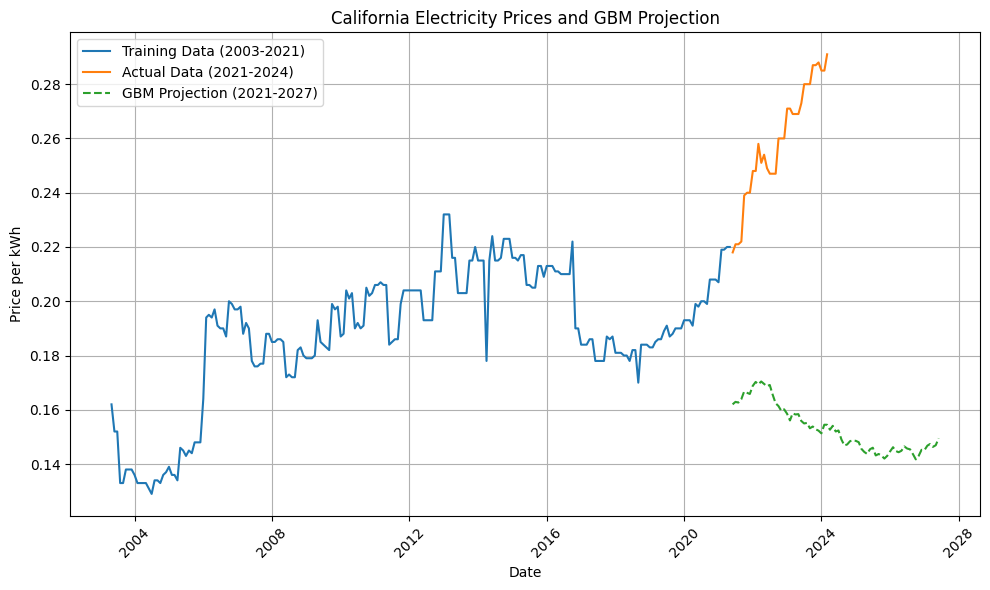

<ipython-input-80-a98598e96622>:22: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)


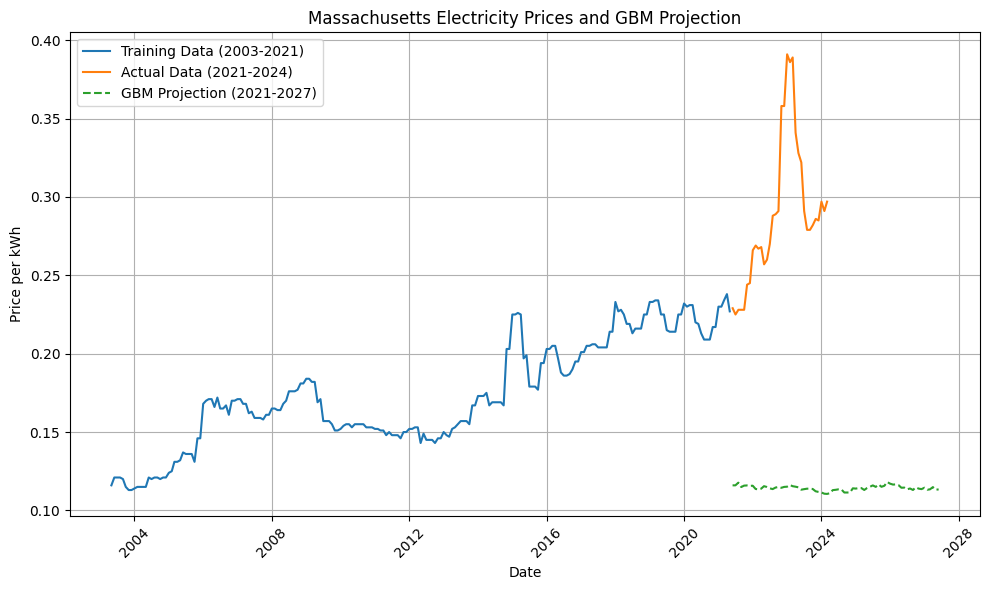

<ipython-input-80-a98598e96622>:22: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)


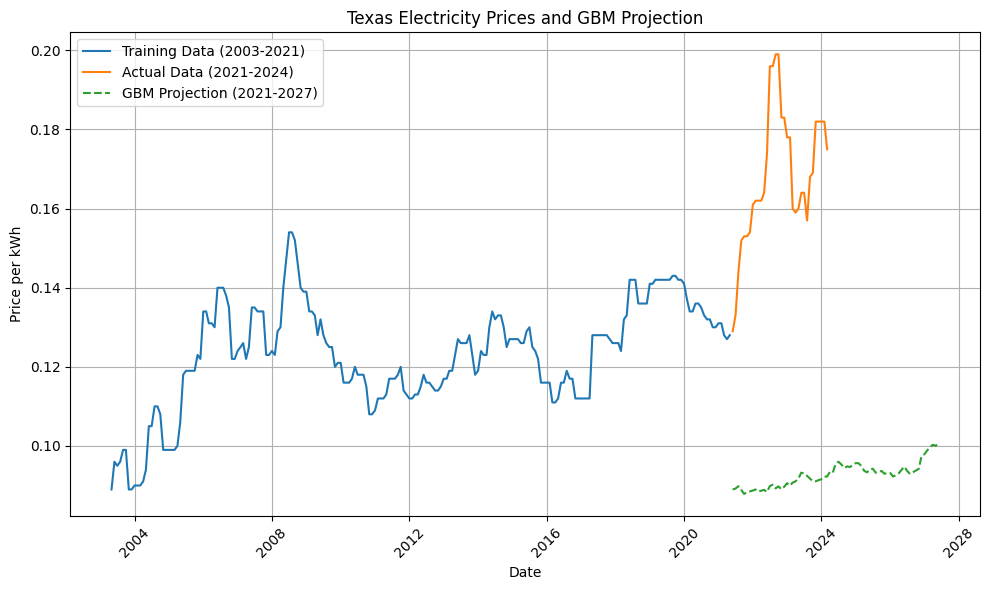

California Parameters:
  Drift (mu): 0.0014168111625924846
  Volatility (sigma): 0.038791811923303596

Massachusetts Parameters:
  Drift (mu): 0.0031081473443288787
  Volatility (sigma): 0.03205890986576981

Texas Parameters:
  Drift (mu): 0.001682379139756839
  Volatility (sigma): 0.030062220783022047



In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
np.random.seed(42)  # For reproducibility

# Function to clean electricity price dataset
def clean_electricity_price_data(file_path):
    """
    Cleans an electricity price dataset by skipping metadata rows, renaming columns, and converting date formats.

    Args:
    file_path (str): The path to the electricity price dataset.

    Returns:
    pd.DataFrame: A cleaned DataFrame containing the electricity price data.
    """
    try:
        df = pd.read_csv(file_path, skiprows=4, engine='python', on_bad_lines='skip')
        df.columns = ['Month', 'Price_per_KWh']
        df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)
        df['Price_per_KWh'] = pd.to_numeric(df['Price_per_KWh'], errors='coerce')  # Convert to numeric
        df = df.dropna()  # Drop rows with NaN values
        return df
    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
        return None
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
        return None

# GBM Simulation Function
def gbm_simulation(S0, mu, sigma, T, n_steps, n_simulations=1):
    dt = T / n_steps
    t = np.linspace(0, T, n_steps + 1)
    W = np.random.normal(0, np.sqrt(dt), (n_simulations, n_steps))
    W = np.concatenate((np.zeros((n_simulations, 1)), W), axis=1).cumsum(axis=1)
    X = (mu - 0.5 * sigma ** 2) * t + sigma * W
    S = S0 * np.exp(X)
    return t, S

# Estimate GBM Parameters (Drift and Volatility)
def estimate_gbm_parameters(prices):
    returns = np.log(prices / prices.shift(1)).dropna()
    mu = returns.mean()
    sigma = returns.std()
    return mu, sigma

# Plot GBM and Validation
def plot_gbm_validation(state_name, elec_df):
    # Filter data for the period of interest
    train_data = elec_df[(elec_df['Month'] >= '2003-05-01') & (elec_df['Month'] <= '2021-05-01')].dropna()
    test_data = elec_df[(elec_df['Month'] > '2021-05-01') & (elec_df['Month'] <= '2024-05-01')].dropna()

    S0 = train_data.iloc[0]['Price_per_KWh']
    mu, sigma = estimate_gbm_parameters(train_data['Price_per_KWh'])

    # Simulate the GBM trajectory (2021-2027)
    t, trajectories = gbm_simulation(S0, mu, sigma, 6, 72, 1)  # 2021-2027
    gbm_dates = pd.date_range('2021-05-01', periods=len(t), freq='M')
    gbm_df = pd.DataFrame({'Month': gbm_dates, 'GBM_Trajectory': trajectories[0]})

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(train_data['Month'], train_data['Price_per_KWh'], label='Training Data (2003-2021)')
    plt.plot(test_data['Month'], test_data['Price_per_KWh'], label='Actual Data (2021-2024)')
    plt.plot(gbm_df['Month'], gbm_df['GBM_Trajectory'], label='GBM Projection (2021-2027)', linestyle='dashed')
    plt.xlabel('Date')
    plt.ylabel('Price per kWh')
    plt.title(f'{state_name} Electricity Prices and GBM Projection')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'/content/{state_name}_GBM_Validation.png')
    plt.show()

    return mu, sigma

# Load and Clean Data for Each State
states = {
    'California': 'CA_ELE.csv',
    'Massachusetts': 'MA_ELE.csv',
    'Texas': 'TX_ELE.csv'
}

state_parameters = {}

for state_name, elec_file in states.items():
    elec_df = clean_electricity_price_data(elec_file)
    mu, sigma = plot_gbm_validation(state_name, elec_df)
    state_parameters[state_name] = {'mu': mu, 'sigma': sigma}

# Display estimated parameters
for state, params in state_parameters.items():
    print(f"{state} Parameters:")
    print(f"  Drift (mu): {params['mu']}")
    print(f"  Volatility (sigma): {params['sigma']}\n")


<ipython-input-81-c2406037bcf2>:22: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)


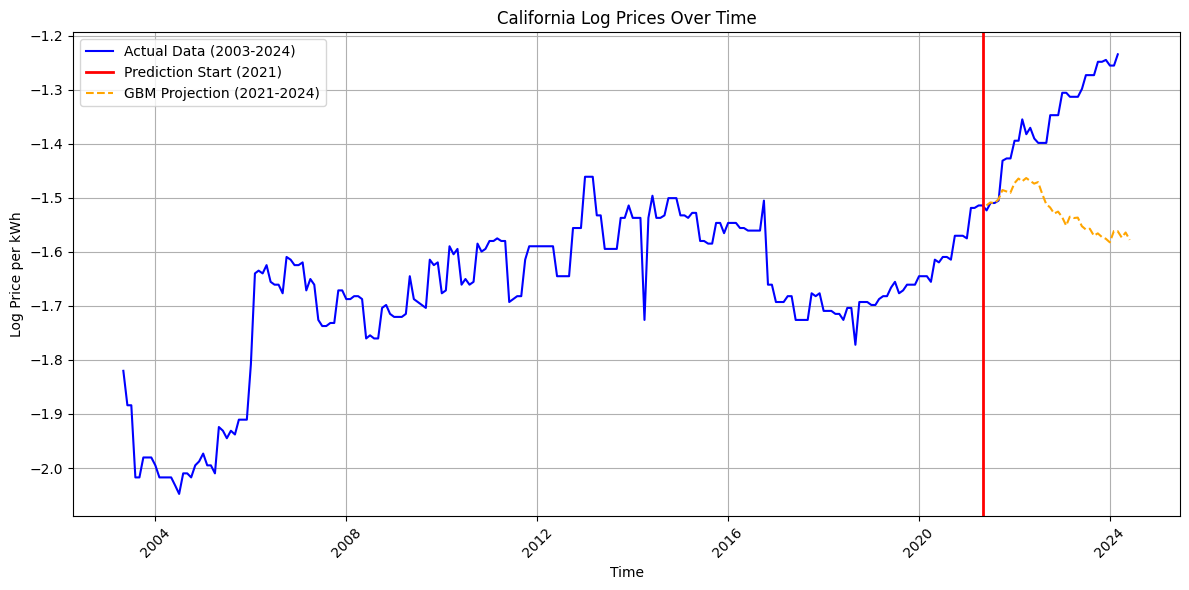

<ipython-input-81-c2406037bcf2>:22: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)


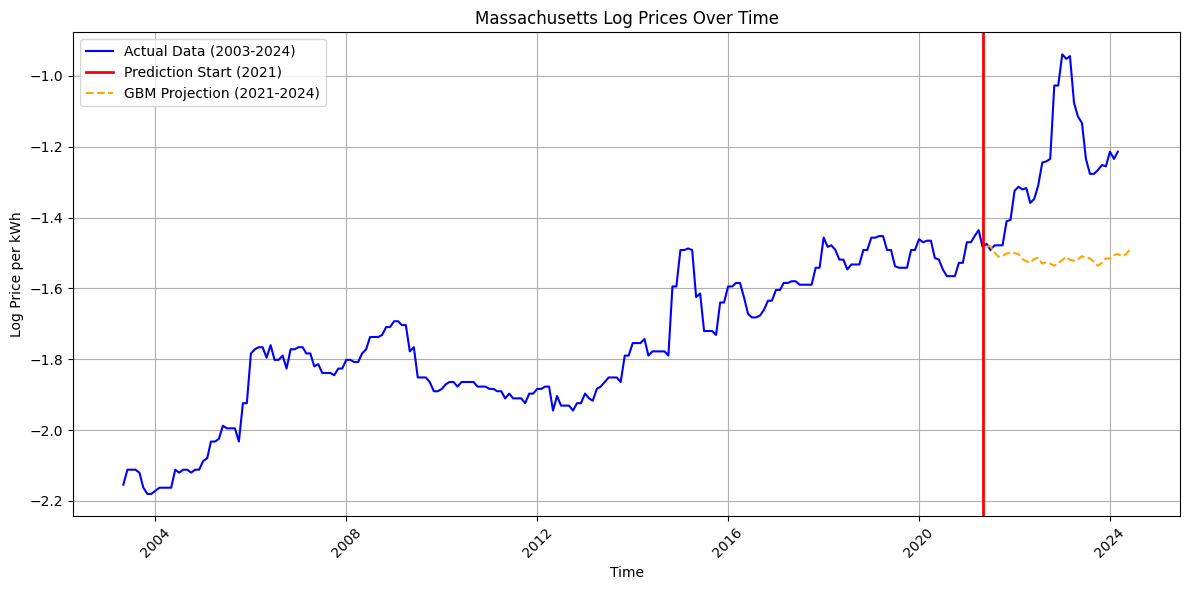

<ipython-input-81-c2406037bcf2>:22: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)


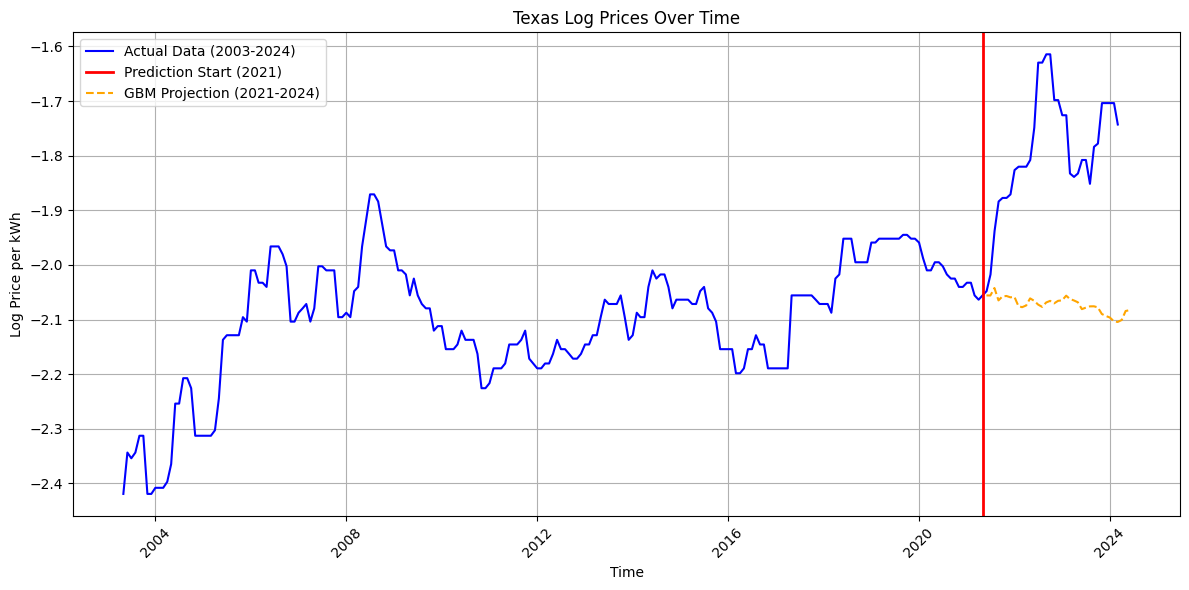

California Parameters:
  Drift (mu): 0.0014168111625924846
  Volatility (sigma): 0.038791811923303596

Massachusetts Parameters:
  Drift (mu): 0.0031081473443288787
  Volatility (sigma): 0.03205890986576981

Texas Parameters:
  Drift (mu): 0.001682379139756839
  Volatility (sigma): 0.030062220783022047



In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
np.random.seed(42)  # For reproducibility

# Function to clean electricity price dataset
def clean_electricity_price_data(file_path):
    """
    Cleans an electricity price dataset by skipping metadata rows, renaming columns, and converting date formats.

    Args:
    file_path (str): The path to the electricity price dataset.

    Returns:
    pd.DataFrame: A cleaned DataFrame containing the electricity price data.
    """
    try:
        df = pd.read_csv(file_path, skiprows=4, engine='python', on_bad_lines='skip')
        df.columns = ['Month', 'Price_per_KWh']
        df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)
        df['Price_per_KWh'] = pd.to_numeric(df['Price_per_KWh'], errors='coerce')  # Convert to numeric
        df = df.dropna()  # Drop rows with NaN values
        return df
    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
        return None
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
        return None

# GBM Simulation Function
def gbm_simulation(S0, mu, sigma, T, n_steps, n_simulations=1):
    dt = T / n_steps
    t = np.linspace(0, T, n_steps + 1)
    W = np.random.normal(0, np.sqrt(dt), (n_simulations, n_steps))
    W = np.concatenate((np.zeros((n_simulations, 1)), W), axis=1).cumsum(axis=1)
    X = (mu - 0.5 * sigma ** 2) * t + sigma * W
    S = S0 * np.exp(X)
    return t, S

# Estimate GBM Parameters (Drift and Volatility)
def estimate_gbm_parameters(prices):
    returns = np.log(prices / prices.shift(1)).dropna()
    mu = returns.mean()
    sigma = returns.std()
    return mu, sigma

# Plot GBM and Validation
def plot_gbm_validation(state_name, elec_df):
    # Filter data for the period of interest
    train_data = elec_df[(elec_df['Month'] >= '2003-05-01') & (elec_df['Month'] <= '2021-05-01')].dropna()
    test_data = elec_df[(elec_df['Month'] > '2021-05-01') & (elec_df['Month'] <= '2024-05-01')].dropna()

    S0 = train_data.iloc[-1]['Price_per_KWh']  # Use the last training value
    mu, sigma = estimate_gbm_parameters(train_data['Price_per_KWh'])

    # Simulate the GBM trajectory (2021-2024)
    t, trajectories = gbm_simulation(S0, mu, sigma, 3, 36, 1)  # 2021-2024
    gbm_dates = pd.date_range('2021-05-01', periods=len(t), freq='M')
    gbm_df = pd.DataFrame({'Month': gbm_dates, 'GBM_Trajectory': trajectories[0]})

    # Combine training and test data
    combined_train_test = pd.concat([train_data, test_data], ignore_index=True)
    combined_train_test['Log_Prices'] = np.log(combined_train_test['Price_per_KWh'])

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(combined_train_test['Month'], combined_train_test['Log_Prices'], label='Actual Data (2003-2024)', color='blue')
    plt.axvline(x=pd.Timestamp('2021-05-01'), color='red', linestyle='-', linewidth=2, label='Prediction Start (2021)')
    plt.plot(gbm_df['Month'], np.log(gbm_df['GBM_Trajectory']), label='GBM Projection (2021-2024)', linestyle='dashed', color='orange')
    plt.xlabel('Time')
    plt.ylabel('Log Price per kWh')
    plt.title(f'{state_name} Log Prices Over Time')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'/content/{state_name}_GBM_Validation_Log.png')
    plt.show()

    return mu, sigma

# Load and Clean Data for Each State
states = {
    'California': 'CA_ELE.csv',
    'Massachusetts': 'MA_ELE.csv',
    'Texas': 'TX_ELE.csv'
}

state_parameters = {}

for state_name, elec_file in states.items():
    elec_df = clean_electricity_price_data(elec_file)
    mu, sigma = plot_gbm_validation(state_name, elec_df)
    state_parameters[state_name] = {'mu': mu, 'sigma': sigma}

# Display estimated parameters
for state, params in state_parameters.items():
    print(f"{state} Parameters:")
    print(f"  Drift (mu): {params['mu']}")
    print(f"  Volatility (sigma): {params['sigma']}\n")


<ipython-input-82-10741858a218>:22: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)
<ipython-input-82-10741858a218>:22: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)
<ipython-input-82-10741858a218>:22: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004

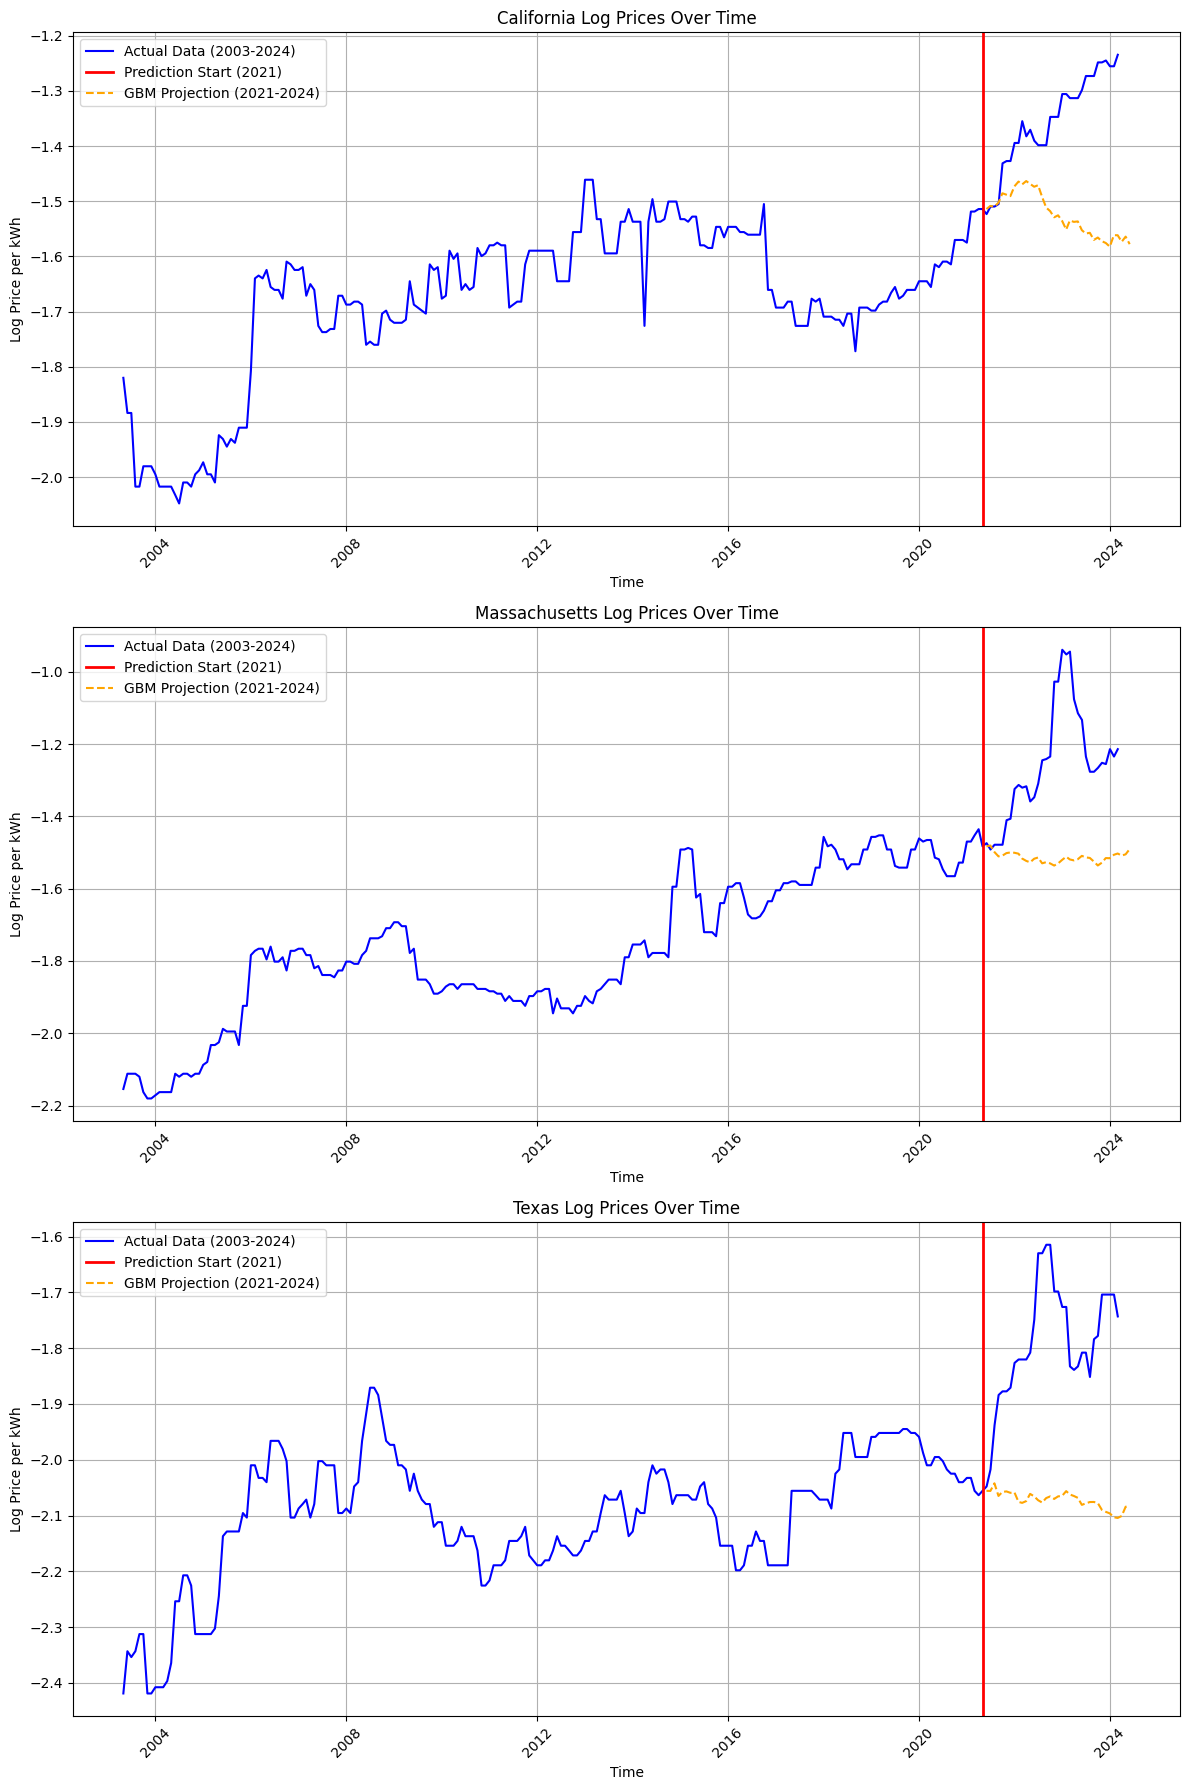

California Parameters:
  Drift (mu): 0.0014168111625924846
  Volatility (sigma): 0.038791811923303596

Massachusetts Parameters:
  Drift (mu): 0.0031081473443288787
  Volatility (sigma): 0.03205890986576981

Texas Parameters:
  Drift (mu): 0.001682379139756839
  Volatility (sigma): 0.030062220783022047



In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
np.random.seed(42)  # For reproducibility

# Function to clean electricity price dataset
def clean_electricity_price_data(file_path):
    """
    Cleans an electricity price dataset by skipping metadata rows, renaming columns, and converting date formats.

    Args:
    file_path (str): The path to the electricity price dataset.

    Returns:
    pd.DataFrame: A cleaned DataFrame containing the electricity price data.
    """
    try:
        df = pd.read_csv(file_path, skiprows=4, engine='python', on_bad_lines='skip')
        df.columns = ['Month', 'Price_per_KWh']
        df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)
        df['Price_per_KWh'] = pd.to_numeric(df['Price_per_KWh'], errors='coerce')  # Convert to numeric
        df = df.dropna()  # Drop rows with NaN values
        return df
    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
        return None
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
        return None

# GBM Simulation Function
def gbm_simulation(S0, mu, sigma, T, n_steps, n_simulations=1):
    dt = T / n_steps
    t = np.linspace(0, T, n_steps + 1)
    W = np.random.normal(0, np.sqrt(dt), (n_simulations, n_steps))
    W = np.concatenate((np.zeros((n_simulations, 1)), W), axis=1).cumsum(axis=1)
    X = (mu - 0.5 * sigma ** 2) * t + sigma * W
    S = S0 * np.exp(X)
    return t, S

# Estimate GBM Parameters (Drift and Volatility)
def estimate_gbm_parameters(prices):
    returns = np.log(prices / prices.shift(1)).dropna()
    mu = returns.mean()
    sigma = returns.std()
    return mu, sigma

# Plot GBM and Validation in Subplots
def plot_gbm_validation_subplot(state_name, elec_df, ax):
    # Filter data for the period of interest
    train_data = elec_df[(elec_df['Month'] >= '2003-05-01') & (elec_df['Month'] <= '2021-05-01')].dropna()
    test_data = elec_df[(elec_df['Month'] > '2021-05-01') & (elec_df['Month'] <= '2024-05-01')].dropna()

    S0 = train_data.iloc[-1]['Price_per_KWh']  # Use the last training value
    mu, sigma = estimate_gbm_parameters(train_data['Price_per_KWh'])

    # Simulate the GBM trajectory (2021-2024)
    t, trajectories = gbm_simulation(S0, mu, sigma, 3, 36, 1)  # 2021-2024
    gbm_dates = pd.date_range('2021-05-01', periods=len(t), freq='M')
    gbm_df = pd.DataFrame({'Month': gbm_dates, 'GBM_Trajectory': trajectories[0]})

    # Combine training and test data
    combined_train_test = pd.concat([train_data, test_data], ignore_index=True)
    combined_train_test['Log_Prices'] = np.log(combined_train_test['Price_per_KWh'])

    # Plot the results
    ax.plot(combined_train_test['Month'], combined_train_test['Log_Prices'], label='Actual Data (2003-2024)', color='blue')
    ax.axvline(x=pd.Timestamp('2021-05-01'), color='red', linestyle='-', linewidth=2, label='Prediction Start (2021)')
    ax.plot(gbm_df['Month'], np.log(gbm_df['GBM_Trajectory']), label='GBM Projection (2021-2024)', linestyle='dashed', color='orange')
    ax.set_xlabel('Time')
    ax.set_ylabel('Log Price per kWh')
    ax.set_title(f'{state_name} Log Prices Over Time')
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

    return mu, sigma

# Plot all three states in one figure
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
states = {
    'California': ('CA_ELE.csv', axs[0]),
    'Massachusetts': ('MA_ELE.csv', axs[1]),
    'Texas': ('TX_ELE.csv', axs[2])
}

state_parameters = {}

for state_name, (elec_file, ax) in states.items():
    elec_df = clean_electricity_price_data(elec_file)
    mu, sigma = plot_gbm_validation_subplot(state_name, elec_df, ax)
    state_parameters[state_name] = {'mu': mu, 'sigma': sigma}

plt.tight_layout()
plt.savefig('/content/All_States_GBM_Validation_Log.png')
plt.show()

# Display estimated parameters
for state, params in state_parameters.items():
    print(f"{state} Parameters:")
    print(f"  Drift (mu): {params['mu']}")
    print(f"  Volatility (sigma): {params['sigma']}\n")


<ipython-input-83-b88f27cac05a>:22: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)
<ipython-input-83-b88f27cac05a>:22: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)
<ipython-input-83-b88f27cac05a>:22: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004

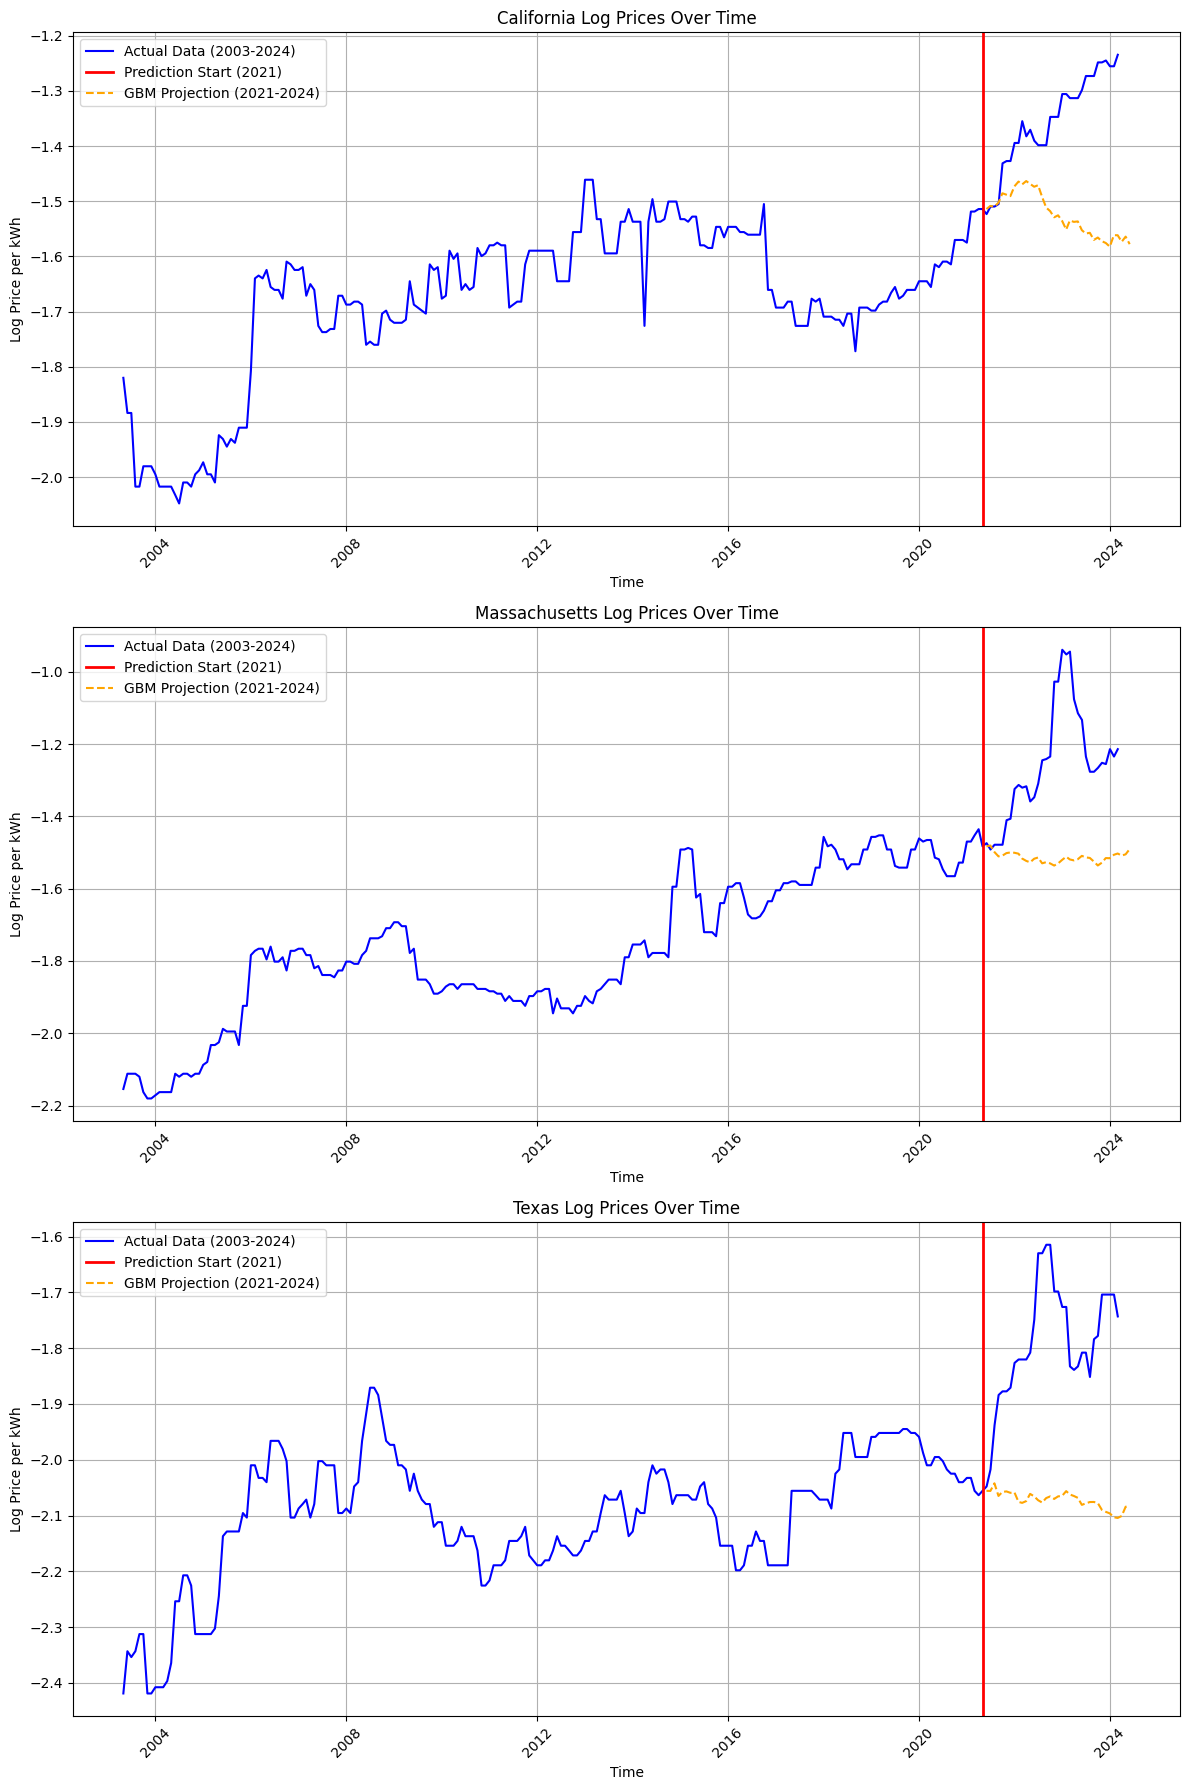

California Parameters:
  Drift (mu): 0.0014168111625924846
  Volatility (sigma): 0.038791811923303596

Massachusetts Parameters:
  Drift (mu): 0.0031081473443288787
  Volatility (sigma): 0.03205890986576981

Texas Parameters:
  Drift (mu): 0.001682379139756839
  Volatility (sigma): 0.030062220783022047



In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
np.random.seed(42)  # For reproducibility

# Function to clean electricity price dataset
def clean_electricity_price_data(file_path):
    """
    Cleans an electricity price dataset by skipping metadata rows, renaming columns, and converting date formats.

    Args:
    file_path (str): The path to the electricity price dataset.

    Returns:
    pd.DataFrame: A cleaned DataFrame containing the electricity price data.
    """
    try:
        df = pd.read_csv(file_path, skiprows=4, engine='python', on_bad_lines='skip')
        df.columns = ['Month', 'Price_per_KWh']
        df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)
        df['Price_per_KWh'] = pd.to_numeric(df['Price_per_KWh'], errors='coerce')  # Convert to numeric
        df = df.dropna()  # Drop rows with NaN values
        return df
    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
        return None
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
        return None

# GBM Simulation Function
def gbm_simulation(S0, mu, sigma, T, n_steps, n_simulations=1):
    dt = T / n_steps
    t = np.linspace(0, T, n_steps + 1)
    W = np.random.normal(0, np.sqrt(dt), (n_simulations, n_steps))
    W = np.concatenate((np.zeros((n_simulations, 1)), W), axis=1).cumsum(axis=1)
    X = (mu - 0.5 * sigma ** 2) * t + sigma * W
    S = S0 * np.exp(X)
    return t, S

# Estimate GBM Parameters (Drift and Volatility)
def estimate_gbm_parameters(prices):
    returns = np.log(prices / prices.shift(1)).dropna()
    mu = returns.mean()
    sigma = returns.std()
    return mu, sigma

# Plot GBM and Validation in Subplots
def plot_gbm_validation_subplot(state_name, elec_df, ax):
    # Filter data for the period of interest
    train_data = elec_df[(elec_df['Month'] >= '2003-05-01') & (elec_df['Month'] <= '2021-05-01')].dropna()
    test_data = elec_df[(elec_df['Month'] > '2021-05-01') & (elec_df['Month'] <= '2024-05-01')].dropna()

    S0 = train_data.iloc[-1]['Price_per_KWh']  # Use the last training value
    mu, sigma = estimate_gbm_parameters(train_data['Price_per_KWh'])

    # Simulate the GBM trajectory (2021-2024)
    t, trajectories = gbm_simulation(S0, mu, sigma, 3, 36, 1)  # 2021-2024
    gbm_dates = pd.date_range('2021-05-01', periods=len(t), freq='M')
    gbm_df = pd.DataFrame({'Month': gbm_dates, 'GBM_Trajectory': trajectories[0]})

    # Combine training and test data
    combined_train_test = pd.concat([train_data, test_data], ignore_index=True)
    combined_train_test['Log_Prices'] = np.log(combined_train_test['Price_per_KWh'])

    # Plot the results
    ax.plot(combined_train_test['Month'], combined_train_test['Log_Prices'], label='Actual Data (2003-2024)', color='blue')
    ax.axvline(x=pd.Timestamp('2021-05-01'), color='red', linestyle='-', linewidth=2, label='Prediction Start (2021)')
    ax.plot(gbm_df['Month'], np.log(gbm_df['GBM_Trajectory']), label='GBM Projection (2021-2024)', linestyle='dashed', color='orange')
    ax.set_xlabel('Time')
    ax.set_ylabel('Log Price per kWh')
    ax.set_title(f'{state_name} Log Prices Over Time')
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

    return mu, sigma

# Plot all three states in one figure
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
states = {
    'California': ('cleaned_CA_ELE.csv', axs[0]),
    'Massachusetts': ('cleaned_MA_ELE.csv', axs[1]),
    'Texas': ('cleaned_TX_ELE.csv', axs[2])
}

state_parameters = {}

for state_name, (elec_file, ax) in states.items():
    elec_df = clean_electricity_price_data(elec_file)
    mu, sigma = plot_gbm_validation_subplot(state_name, elec_df, ax)
    state_parameters[state_name] = {'mu': mu, 'sigma': sigma}

plt.tight_layout()
plt.savefig('/content/All_States_GBM_Validation_Log.png')
plt.show()

# Display estimated parameters
for state, params in state_parameters.items():
    print(f"{state} Parameters:")
    print(f"  Drift (mu): {params['mu']}")
    print(f"  Volatility (sigma): {params['sigma']}\n")


<ipython-input-84-cecf6f33a1fe>:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)
<ipython-input-84-cecf6f33a1fe>:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)
<ipython-input-84-cecf6f33a1fe>:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004

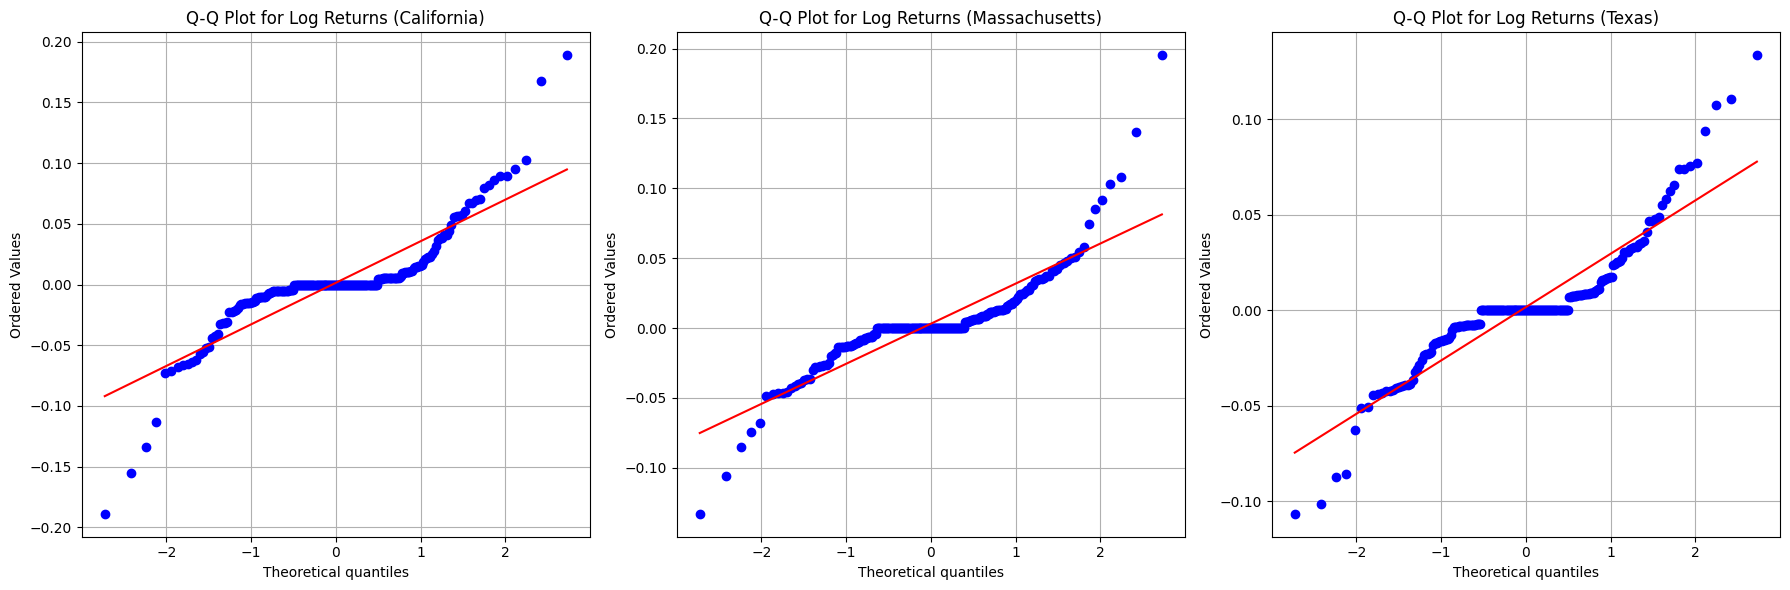

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Constants
np.random.seed(42)  # For reproducibility

# Function to clean electricity price dataset
def clean_electricity_price_data(file_path):
    try:
        df = pd.read_csv(file_path, skiprows=4, engine='python', on_bad_lines='skip')
        df.columns = ['Month', 'Price_per_KWh']
        df['Month'] = pd.to_datetime(df['Month'], errors='coerce', infer_datetime_format=True)
        df['Price_per_KWh'] = pd.to_numeric(df['Price_per_KWh'], errors='coerce')  # Convert to numeric
        df = df.dropna()  # Drop rows with NaN values
        return df
    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
        return None
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
        return None

# Q-Q Plot Function
def generate_qq_plot(returns, state_name, ax):
    stats.probplot(returns, dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot for Log Returns ({state_name})')
    ax.grid(True)

# Load and Clean Data for Each State
states = {
    'California': 'CA_ELE.csv',
    'Massachusetts': 'MA_ELE.csv',
    'Texas': 'TX_ELE.csv'
}

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, (state_name, elec_file) in enumerate(states.items()):
    elec_df = clean_electricity_price_data(elec_file)
    train_data = elec_df[(elec_df['Month'] >= '2003-05-01') & (elec_df['Month'] <= '2021-05-01')].dropna()
    returns = np.log(train_data['Price_per_KWh'] / train_data['Price_per_KWh'].shift(1)).dropna()
    generate_qq_plot(returns, state_name, axs[i])

plt.tight_layout()
plt.savefig('All_States_QQ_Plots.png')
plt.show()


# Now incorperate the effect of gas price

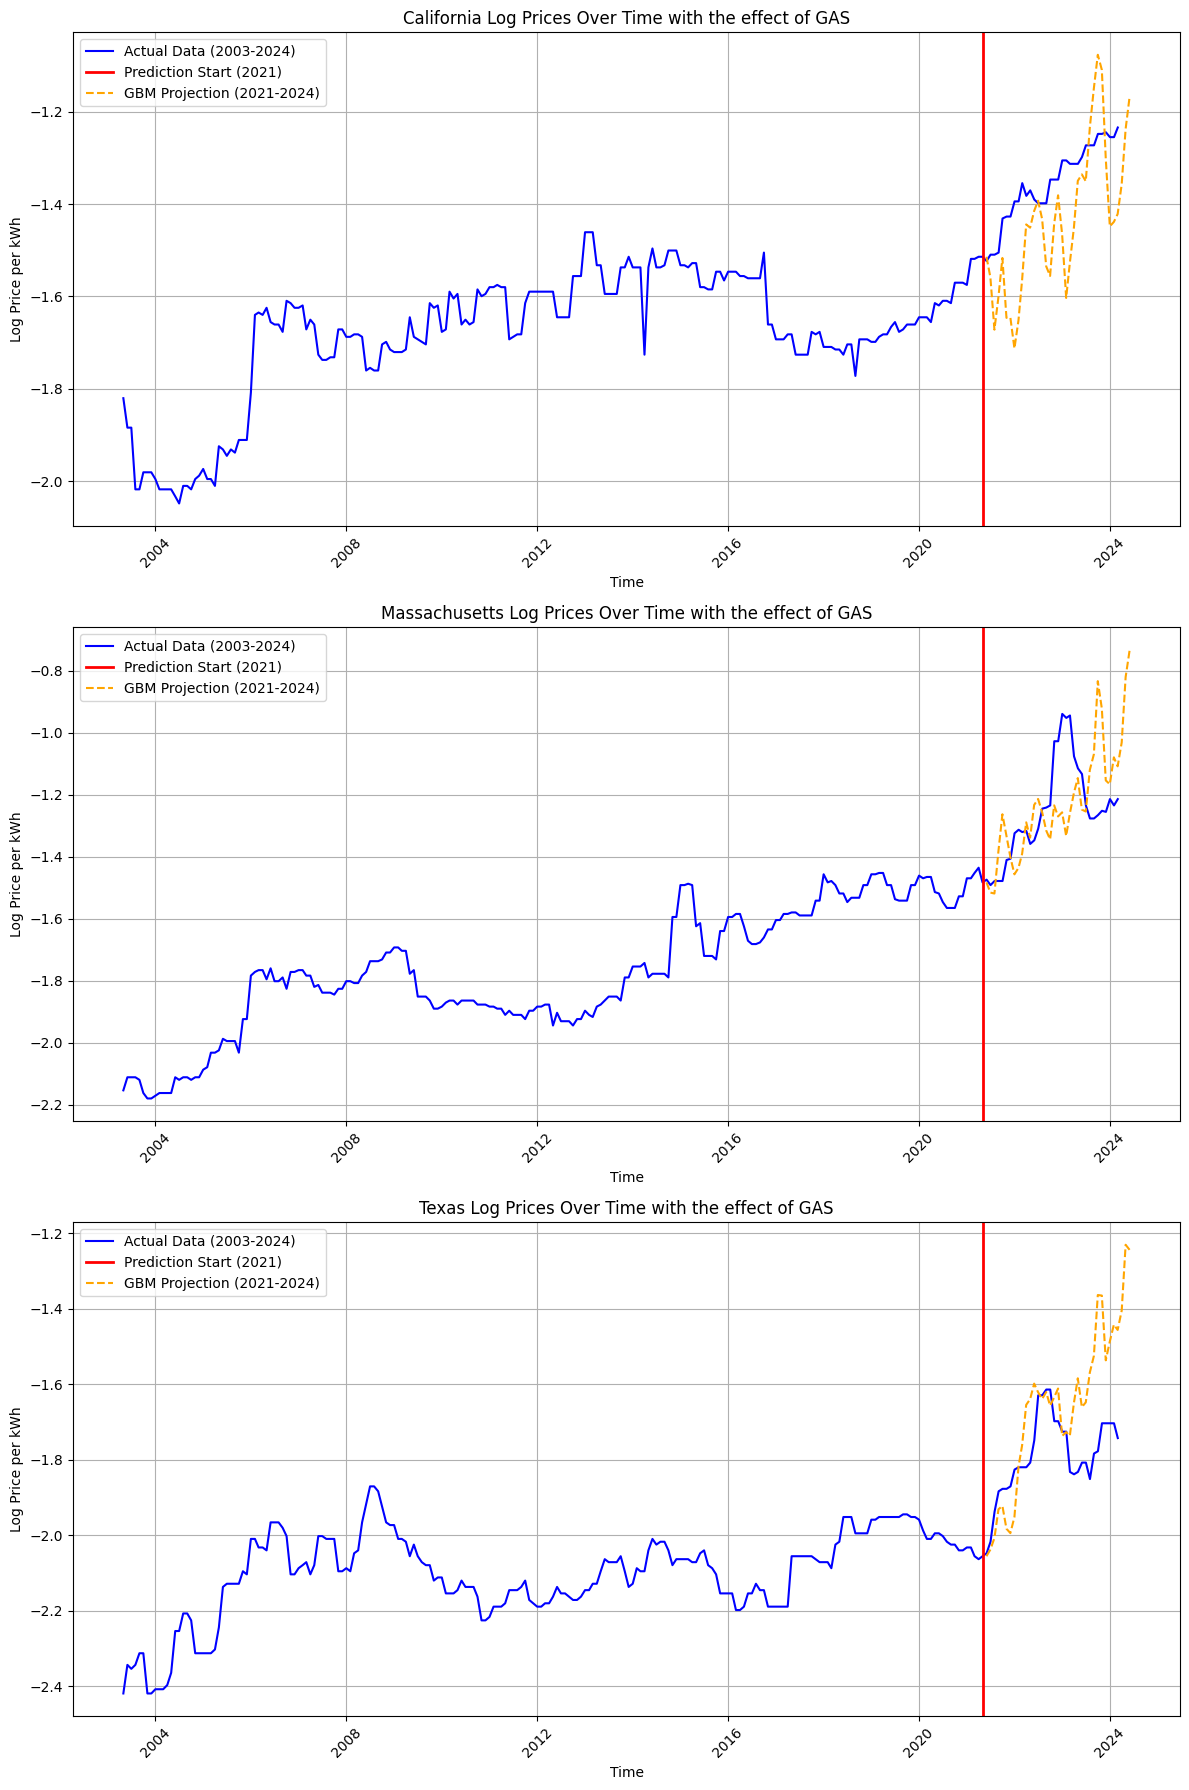

California Parameters:
  Drift (mu): 0.0014168111625924846
  Volatility (sigma): 0.038791811923303596

Massachusetts Parameters:
  Drift (mu): 0.0031081473443288787
  Volatility (sigma): 0.03205890986576981

Texas Parameters:
  Drift (mu): 0.001682379139756839
  Volatility (sigma): 0.030062220783022047



In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
np.random.seed(42)  # For reproducibility
GAS_TO_KWH_RATIO = 7.5  # 1 gallon of gas is roughly equivalent to 7.5 kWh

# Function to clean electricity price dataset
def clean_electricity_price_data(file_path):
    try:
        df = pd.read_csv(file_path, skiprows=4, engine='python', on_bad_lines='skip')
        df.columns = ['Month', 'Price_per_KWh']
        df['Month'] = pd.to_datetime(df['Month'], errors='coerce')
        df['Price_per_KWh'] = pd.to_numeric(df['Price_per_KWh'], errors='coerce')  # Convert to numeric
        df = df.dropna()  # Drop rows with NaN values
        return df
    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
        return None
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
        return None

# Function to clean gasoline price dataset and convert to kWh equivalents
def clean_gas_price_data(file_path):
    try:
        df = pd.read_csv(file_path, skiprows=4, engine='python', on_bad_lines='skip')
        df.columns = ['Week', 'Price_per_Gallon']
        df['Week'] = pd.to_datetime(df['Week'], errors='coerce')
        df = df.set_index('Week').resample('M').mean().reset_index()
        df.columns = ['Month', 'Price_per_Gallon']
        df['Price_per_KWh_Equivalent'] = df['Price_per_Gallon'] / GAS_TO_KWH_RATIO
        return df
    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
        return None
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
        return None

# GBM Simulation Function with Correlation
def gbm_simulation_with_correlation(S0, mu, sigma, T, n_steps, rho=0, S_gas=None):
    dt = T / n_steps
    t = np.linspace(0, T, n_steps + 1)

    # Generate correlated Brownian motions
    mean = [0, 0]
    cov = [[1, rho], [rho, 1]]
    try:
        W = np.random.multivariate_normal(mean, cov, size=n_steps)
    except np.linalg.LinAlgError:
        print("Warning: Covariance matrix not positive definite. Using fallback.")
        W = np.random.randn(n_steps, 2)
    W = np.concatenate((np.zeros((1, 2)), W)).cumsum(axis=0)

    X = (mu - 0.5 * sigma ** 2) * t + sigma * W[:, 0]
    S = S0 * np.exp(X)
    if S_gas is not None:
        S *= S_gas[:len(S)] / S_gas[0]  # Adjust by gasoline trajectory

    return t, S

# Estimate GBM Parameters (Drift and Volatility)
def estimate_gbm_parameters(prices):
    returns = np.log(prices / prices.shift(1)).dropna()
    mu = returns.mean()
    sigma = returns.std()
    return mu, sigma

# Calculate correlation between electricity and gasoline prices
def calculate_correlation(elec_df, gas_df):
    merged_df = pd.merge(elec_df, gas_df, on='Month').dropna()
    returns_elec = np.log(merged_df['Price_per_KWh'] / merged_df['Price_per_KWh'].shift(1)).dropna()
    returns_gas = np.log(merged_df['Price_per_KWh_Equivalent'] / merged_df['Price_per_KWh_Equivalent'].shift(1)).dropna()
    return returns_elec.corr(returns_gas)

# Plot GBM and Validation in Subplots
def plot_gbm_validation_subplot(state_name, elec_df, gas_df, ax):
    # Filter data for the period of interest
    train_data = elec_df[(elec_df['Month'] >= '2003-05-01') & (elec_df['Month'] <= '2021-05-01')].dropna()
    test_data = elec_df[(elec_df['Month'] > '2021-05-01') & (elec_df['Month'] <= '2024-05-01')].dropna()
    train_gas_data = gas_df[(gas_df['Month'] >= '2003-05-01') & (gas_df['Month'] <= '2021-05-01')].dropna()

    S0 = train_data.iloc[-1]['Price_per_KWh']  # Use the last training value
    S_gas = train_gas_data['Price_per_KWh_Equivalent'].values
    mu, sigma = estimate_gbm_parameters(train_data['Price_per_KWh'])
    rho = calculate_correlation(train_data, train_gas_data)

    # Simulate the GBM trajectory (2021-2024)
    t, trajectories = gbm_simulation_with_correlation(S0, mu, sigma, 3, 36, rho, S_gas)  # 2021-2024
    gbm_dates = pd.date_range('2021-05-01', periods=len(t), freq='M')
    gbm_df = pd.DataFrame({'Month': gbm_dates, 'GBM_Trajectory': trajectories})

    # Combine training and test data
    combined_train_test = pd.concat([train_data, test_data], ignore_index=True)
    combined_train_test['Log_Prices'] = np.log(combined_train_test['Price_per_KWh'])

    # Plot the results
    ax.plot(combined_train_test['Month'], combined_train_test['Log_Prices'], label='Actual Data (2003-2024)', color='blue')
    ax.axvline(x=pd.Timestamp('2021-05-01'), color='red', linestyle='-', linewidth=2, label='Prediction Start (2021)')
    ax.plot(gbm_df['Month'], np.log(gbm_df['GBM_Trajectory']), label='GBM Projection (2021-2024)', linestyle='dashed', color='orange')
    ax.set_xlabel('Time')
    ax.set_ylabel('Log Price per kWh')
    ax.set_title(f'{state_name} Log Prices Over Time with the effect of GAS')
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

    return mu, sigma

# Plot all three states in one figure
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
states = {
    'California': ('cleaned_CA_ELE.csv', 'cleaned_CA_GAS.csv', axs[0]),
    'Massachusetts': ('cleaned_MA_ELE.csv', 'cleaned_MA_GAS.csv', axs[1]),
    'Texas': ('cleaned_TX_ELE.csv', 'cleaned_TX_GAS.csv', axs[2])
}

state_parameters = {}

for state_name, (elec_file, gas_file, ax) in states.items():
    elec_df = clean_electricity_price_data(elec_file)
    gas_df = clean_gas_price_data(gas_file)
    mu, sigma = plot_gbm_validation_subplot(state_name, elec_df, gas_df, ax)
    state_parameters[state_name] = {'mu': mu, 'sigma': sigma}

plt.tight_layout()
plt.savefig('All_States_GBM_with_Gasoline_Validation_Log.png')
plt.show()

# Display estimated parameters
for state, params in state_parameters.items():
    print(f"{state} Parameters:")
    print(f"  Drift (mu): {params['mu']}")
    print(f"  Volatility (sigma): {params['sigma']}\n")


In [86]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Constants
GAS_TO_KWH_RATIO = 7.5

# Function to clean electricity price dataset
def clean_electricity_price_data(file_path):
    try:
        df = pd.read_csv(file_path, skiprows=4, engine='python', on_bad_lines='skip')
        df.columns = ['Month', 'Price_per_KWh']
        df['Month'] = pd.to_datetime(df['Month'], errors='coerce')
        df['Price_per_KWh'] = pd.to_numeric(df['Price_per_KWh'], errors='coerce')  # Convert to numeric
        df = df.dropna()  # Drop rows with NaN values
        return df
    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
        return None
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
        return None

# Function to clean gasoline price dataset and convert to kWh equivalents
def clean_gas_price_data(file_path):
    try:
        df = pd.read_csv(file_path, skiprows=4, engine='python', on_bad_lines='skip')
        df.columns = ['Week', 'Price_per_Gallon']
        df['Week'] = pd.to_datetime(df['Week'], errors='coerce')
        df = df.set_index('Week').resample('M').mean().reset_index()
        df.columns = ['Month', 'Price_per_Gallon']
        df['Price_per_KWh_Equivalent'] = df['Price_per_Gallon'] / GAS_TO_KWH_RATIO
        return df
    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
        return None
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
        return None

# GBM Simulation Function with Correlation
def gbm_simulation_with_correlation(S0, mu, sigma, T, n_steps, rho=0, S_gas=None):
    dt = T / n_steps
    t = np.linspace(0, T, n_steps + 1)

    # Generate correlated Brownian motions
    mean = [0, 0]
    cov = [[1, rho], [rho, 1]]
    try:
        W = np.random.multivariate_normal(mean, cov, size=n_steps)
    except np.linalg.LinAlgError:
        print("Warning: Covariance matrix not positive definite. Using fallback.")
        W = np.random.randn(n_steps, 2)
    W = np.concatenate((np.zeros((1, 2)), W)).cumsum(axis=0)

    X = (mu - 0.5 * sigma ** 2) * t + sigma * W[:, 0]
    S = S0 * np.exp(X)
    if S_gas is not None:
        S *= S_gas[:len(S)] / S_gas[0]  # Adjust by gasoline trajectory

    return t, S

# Estimate GBM Parameters (Drift and Volatility)
def estimate_gbm_parameters(prices):
    returns = np.log(prices / prices.shift(1)).dropna()
    mu = returns.mean()
    sigma = returns.std()
    return mu, sigma

# Calculate correlation between electricity and gasoline prices
def calculate_correlation(elec_df, gas_df):
    merged_df = pd.merge(elec_df, gas_df, on='Month').dropna()
    returns_elec = np.log(merged_df['Price_per_KWh'] / merged_df['Price_per_KWh'].shift(1)).dropna()
    returns_gas = np.log(merged_df['Price_per_KWh_Equivalent'] / merged_df['Price_per_KWh_Equivalent'].shift(1)).dropna()
    return returns_elec.corr(returns_gas)

# Function to calculate residuals between actual and predicted prices
def calculate_residuals(actual_prices, predicted_prices):
    residuals = np.log(actual_prices) - np.log(predicted_prices)
    return residuals

# Function to perform statistical tests on model residuals
def test_gbm_validity(actual_prices, predicted_prices):
    residuals = calculate_residuals(actual_prices, predicted_prices)

    # Kolmogorov-Smirnov Test for normality
    ks_stat, ks_pvalue = stats.kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))

    # Shapiro-Wilk Test for normality
    sw_stat, sw_pvalue = stats.shapiro(residuals)

    # Mean Squared Error (MSE) and Mean Absolute Error (MAE)
    mse = mean_squared_error(np.log(actual_prices), np.log(predicted_prices))
    mae = mean_absolute_error(np.log(actual_prices), np.log(predicted_prices))

    return {
        "Kolmogorov-Smirnov Test": {"Statistic": ks_stat, "P-Value": ks_pvalue},
        "Shapiro-Wilk Test": {"Statistic": sw_stat, "P-Value": sw_pvalue},
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae
    }

# Plot GBM and Validation
def plot_gbm_validation_subplot(state_name, elec_df, gas_df):
    train_data = elec_df[(elec_df['Month'] >= '2003-05-01') & (elec_df['Month'] <= '2021-05-01')].dropna()
    test_data = elec_df[(elec_df['Month'] > '2021-05-01') & (elec_df['Month'] <= '2024-05-01')].dropna()
    train_gas_data = gas_df[(gas_df['Month'] >= '2003-05-01') & (gas_df['Month'] <= '2021-05-01')].dropna()

    S0 = train_data.iloc[-1]['Price_per_KWh']
    S_gas = train_gas_data['Price_per_KWh_Equivalent'].values
    mu, sigma = estimate_gbm_parameters(train_data['Price_per_KWh'])
    rho = calculate_correlation(train_data, train_gas_data)

    t, trajectories = gbm_simulation_with_correlation(S0, mu, sigma, 3, 36, rho, S_gas)
    gbm_dates = pd.date_range('2021-05-01', periods=len(t), freq='M')
    gbm_df = pd.DataFrame({'Month': gbm_dates, 'GBM_Trajectory': trajectories})

    # Combine training and test data
    combined_train_test = pd.concat([train_data, test_data], ignore_index=True)
    combined_train_test['Log_Prices'] = np.log(combined_train_test['Price_per_KWh'])

    return combined_train_test, gbm_df

# Load California datasets
ca_gas_path = 'cleaned_CA_GAS.csv'
ca_elec_path = 'cleaned_CA_ELE.csv'
ca_gas_df = clean_gas_price_data(ca_gas_path)
ca_elec_df = clean_electricity_price_data(ca_elec_path)

# Plot GBM validation and get predictions
combined_train_test, gbm_df = plot_gbm_validation_subplot('California', ca_elec_df, ca_gas_df)

# Load actual and predicted prices
ca_actual_data = combined_train_test[(combined_train_test['Month'] > '2021-05-01') & (combined_train_test['Month'] <= '2024-05-01')]['Price_per_KWh'].values
ca_predicted_data = gbm_df[(gbm_df['Month'] > '2021-05-01') & (gbm_df['Month'] <= '2024-05-01')]['GBM_Trajectory'].values

# Ensure matching lengths
min_length = min(len(ca_actual_data), len(ca_predicted_data))
ca_actual_data = ca_actual_data[:min_length]
ca_predicted_data = ca_predicted_data[:min_length]

# Run statistical tests on the model
results = test_gbm_validity(ca_actual_data, ca_predicted_data)

# Display results
for test_name, test_results in results.items():
    print(f"{test_name}: {test_results}")


Kolmogorov-Smirnov Test: {'Statistic': 0.08274152405724089, 'P-Value': 0.9590078886511726}
Shapiro-Wilk Test: {'Statistic': 0.9800822138786316, 'P-Value': 0.7753967642784119}
Mean Squared Error: 0.030451148615593747
Mean Absolute Error: 0.1528595128917943


In [87]:
# Load Massachusetts datasets
ma_gas_path = 'cleaned_MA_GAS.csv'
ma_elec_path = 'cleaned_MA_ELE.csv'
ma_gas_df = clean_gas_price_data(ma_gas_path)
ma_elec_df = clean_electricity_price_data(ma_elec_path)

# Plot GBM validation and get predictions
combined_train_test, gbm_df = plot_gbm_validation_subplot('Massachusetts', ma_elec_df, ma_gas_df)

# Load actual and predicted prices
ma_actual_data = combined_train_test[(combined_train_test['Month'] > '2021-05-01') & (combined_train_test['Month'] <= '2024-05-01')]['Price_per_KWh'].values
ma_predicted_data = gbm_df[(gbm_df['Month'] > '2021-05-01') & (gbm_df['Month'] <= '2024-05-01')]['GBM_Trajectory'].values

# Ensure matching lengths
min_length = min(len(ma_actual_data), len(ma_predicted_data))
ma_actual_data = ma_actual_data[:min_length]
ma_predicted_data = ma_predicted_data[:min_length]

# Run statistical tests on the model
ma_results = test_gbm_validity(ma_actual_data, ma_predicted_data)

# Display results for Massachusetts
print("\nMassachusetts Results:")
for test_name, test_results in ma_results.items():
    print(f"{test_name}: {test_results}")

# Load Texas datasets
tx_gas_path = 'cleaned_TX_GAS.csv'
tx_elec_path = 'cleaned_TX_ELE.csv'
tx_gas_df = clean_gas_price_data(tx_gas_path)
tx_elec_df = clean_electricity_price_data(tx_elec_path)

# Plot GBM validation and get predictions
combined_train_test, gbm_df = plot_gbm_validation_subplot('Texas', tx_elec_df, tx_gas_df)

# Load actual and predicted prices
tx_actual_data = combined_train_test[(combined_train_test['Month'] > '2021-05-01') & (combined_train_test['Month'] <= '2024-05-01')]['Price_per_KWh'].values
tx_predicted_data = gbm_df[(gbm_df['Month'] > '2021-05-01') & (gbm_df['Month'] <= '2024-05-01')]['GBM_Trajectory'].values

# Ensure matching lengths
min_length = min(len(tx_actual_data), len(tx_predicted_data))
tx_actual_data = tx_actual_data[:min_length]
tx_predicted_data = tx_predicted_data[:min_length]

# Run statistical tests on the model
tx_results = test_gbm_validity(tx_actual_data, tx_predicted_data)

# Display results for Texas
print("\nTexas Results:")
for test_name, test_results in tx_results.items():
    print(f"{test_name}: {test_results}")



Massachusetts Results:
Kolmogorov-Smirnov Test: {'Statistic': 0.1038220799412195, 'P-Value': 0.8205362537212024}
Shapiro-Wilk Test: {'Statistic': 0.9751619696617126, 'P-Value': 0.6166614294052124}
Mean Squared Error: 0.03253002627184391
Mean Absolute Error: 0.13481614621974217

Texas Results:
Kolmogorov-Smirnov Test: {'Statistic': 0.15276059823185817, 'P-Value': 0.3680531678386919}
Shapiro-Wilk Test: {'Statistic': 0.9471296668052673, 'P-Value': 0.10071820765733719}
Mean Squared Error: 0.05883801970720753
Mean Absolute Error: 0.18855748099725678


# Sensitivity

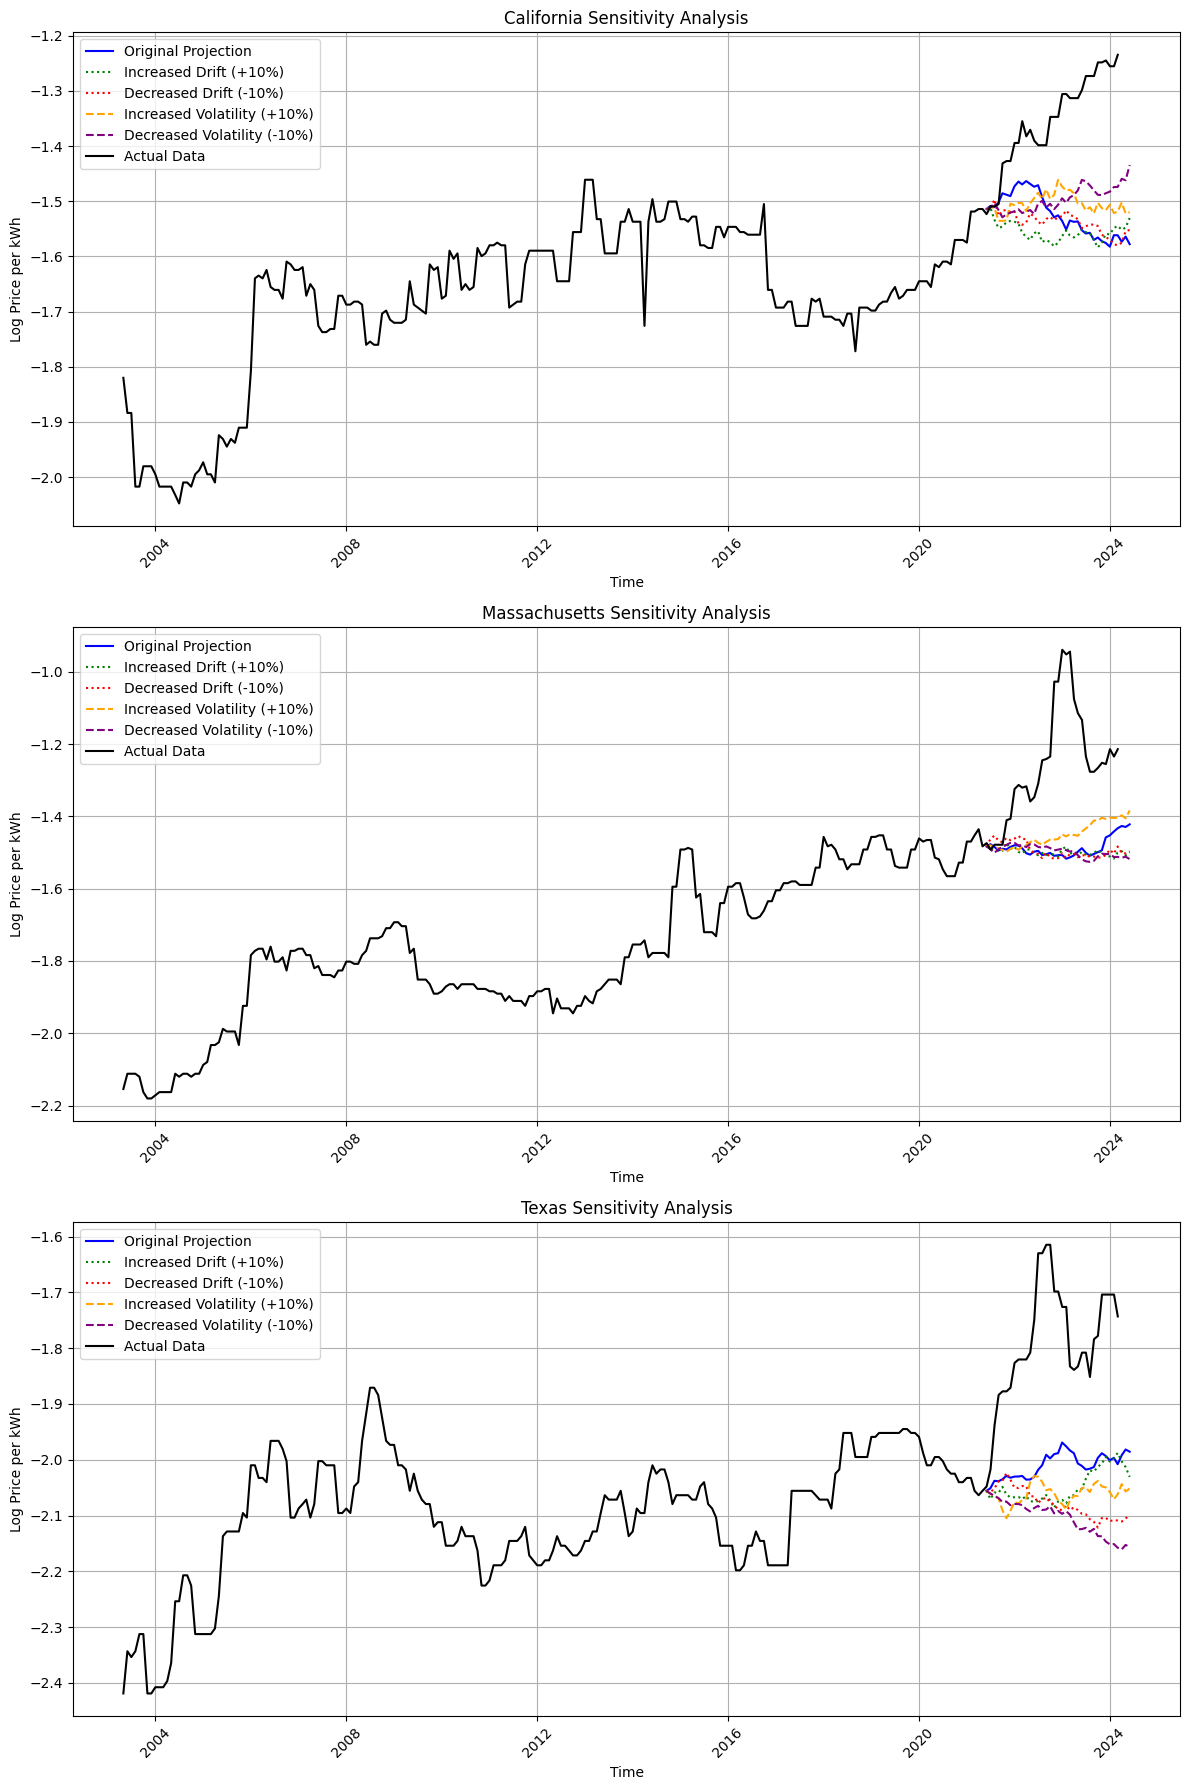

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
np.random.seed(42)

# Function to simulate GBM
def gbm_simulation(S0, mu, sigma, T, n_steps, n_simulations=1):
    dt = T / n_steps
    t = np.linspace(0, T, n_steps + 1)
    W = np.random.normal(0, np.sqrt(dt), (n_simulations, n_steps))
    W = np.concatenate((np.zeros((n_simulations, 1)), W), axis=1).cumsum(axis=1)
    X = (mu - 0.5 * sigma ** 2) * t + sigma * W
    S = S0 * np.exp(X)
    return t, S

# Sensitivity analysis for each state with axis input
def sensitivity_analysis(state_name, elec_df, mu, sigma, ax):
    # Filter training and testing data
    train_data = elec_df[(elec_df['Month'] >= '2003-05-01') & (elec_df['Month'] <= '2021-05-01')].dropna()
    test_data = elec_df[(elec_df['Month'] > '2021-05-01') & (elec_df['Month'] <= '2024-05-01')].dropna()

    S0 = train_data.iloc[-1]['Price_per_KWh']
    T = 3  # 3 years
    n_steps = 36  # Monthly
    perturbation = 0.1  # 10% perturbation

    # Original GBM
    t, original_trajectory = gbm_simulation(S0, mu, sigma, T, n_steps)

    # Perturbed GBM - Increased and Decreased Drift
    t, mu_increase = gbm_simulation(S0, mu * (1 + perturbation), sigma, T, n_steps)
    t, mu_decrease = gbm_simulation(S0, mu * (1 - perturbation), sigma, T, n_steps)

    # Perturbed GBM - Increased and Decreased Volatility
    t, sigma_increase = gbm_simulation(S0, mu, sigma * (1 + perturbation), T, n_steps)
    t, sigma_decrease = gbm_simulation(S0, mu, sigma * (1 - perturbation), T, n_steps)

    gbm_dates = pd.date_range('2021-05-01', periods=len(t), freq='M')
    ax.plot(gbm_dates, np.log(original_trajectory[0]), label='Original Projection', color='blue')
    ax.plot(gbm_dates, np.log(mu_increase[0]), label='Increased Drift (+10%)', linestyle='dotted', color='green')
    ax.plot(gbm_dates, np.log(mu_decrease[0]), label='Decreased Drift (-10%)', linestyle='dotted', color='red')
    ax.plot(gbm_dates, np.log(sigma_increase[0]), label='Increased Volatility (+10%)', linestyle='dashed', color='orange')
    ax.plot(gbm_dates, np.log(sigma_decrease[0]), label='Decreased Volatility (-10%)', linestyle='dashed', color='purple')

    # Add Actual Data
    combined_train_test = pd.concat([train_data, test_data], ignore_index=True)
    combined_train_test['Log_Prices'] = np.log(combined_train_test['Price_per_KWh'])
    ax.plot(combined_train_test['Month'], combined_train_test['Log_Prices'], label='Actual Data', color='black', linestyle='solid')

    ax.set_xlabel('Time')
    ax.set_ylabel('Log Price per kWh')
    ax.set_title(f'{state_name} Sensitivity Analysis')
    ax.grid(True)
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

# Testing sensitivity analysis for California, Massachusetts, and Texas in one graph
def run_sensitivity_tests():
    # Load datasets
    ca_elec_path = 'cleaned_CA_ELE.csv'
    ma_elec_path = 'cleaned_MA_ELE.csv'
    tx_elec_path = 'cleaned_TX_ELE.csv'

    ca_elec_df = clean_electricity_price_data(ca_elec_path)
    ma_elec_df = clean_electricity_price_data(ma_elec_path)
    tx_elec_df = clean_electricity_price_data(tx_elec_path)

    fig, axs = plt.subplots(3, 1, figsize=(12, 18))

    # California Parameters
    mu_ca = 0.0014168111625924846
    sigma_ca = 0.038791811923303596
    sensitivity_analysis('California', ca_elec_df, mu_ca, sigma_ca, axs[0])

    # Massachusetts Parameters
    mu_ma = 0.0031081473443288787
    sigma_ma = 0.03205890986576981
    sensitivity_analysis('Massachusetts', ma_elec_df, mu_ma, sigma_ma, axs[1])

    # Texas Parameters
    mu_tx = 0.001682379139756839
    sigma_tx = 0.030062220783022047
    sensitivity_analysis('Texas', tx_elec_df, mu_tx, sigma_tx, axs[2])

    fig.tight_layout()
    plt.show()

# Helper functions to clean electricity price data
def clean_electricity_price_data(file_path):
    try:
        df = pd.read_csv(file_path, skiprows=4, engine='python', on_bad_lines='skip')
        df.columns = ['Month', 'Price_per_KWh']
        df['Month'] = pd.to_datetime(df['Month'], errors='coerce')
        df['Price_per_KWh'] = pd.to_numeric(df['Price_per_KWh'], errors='coerce')
        df = df.dropna()
        return df
    except pd.errors.ParserError as e:
        print(f"ParserError: {e}")
        return None
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
        return None

# Run sensitivity tests
run_sensitivity_tests()
